# Pytorch Based Regression

Zhaohua Tian
2021 07 13

这个笔记是为了学习用Pytroch进行多远变量的回归分析,
http://zhaoxuhui.top/blog/2018/09/11/PyTorchNote2.html.

## 更新日志
### 2021 07 13
我在原始教程的基础上加了一些层，增加了非线性，不然像余弦函数这样的函数是没有办法好好拟合的。

另外我还将训练过程导出为视频或者Gif，便于直观理解训练的过程。

## 一个变量到一个变量的回归

In [2]:
import torch
from matplotlib import pyplot as plt
import torch.nn.functional as F

In [82]:
class Net(torch.nn.Module):
    # Net类的初始化函数
    def __init__(self, n_feature, n_hidden, n_output):
        # 继承父类的初始化函数
        super(Net, self).__init__()
        # 网络的隐藏层创建，名称可以随便起
        self.hidden_layer_1 = torch.nn.Linear(n_feature, 50)
        self.hidden_layer_2 = torch.nn.Linear(50, 70)
        self.hidden_layer_3 = torch.nn.Linear(70, 30)
        self.hidden_layer_4 = torch.nn.Linear(30, n_hidden)
        # 输出层(预测层)创建，接收来自隐含层的数据
        self.predict_layer = torch.nn.Linear(n_hidden, n_output)

    # 网络的前向传播函数，构造计算图
    def forward(self, x):
        # 用relu函数处理隐含层输出的结果并传给输出层
        x = F.relu(self.hidden_layer_1(x))
        x = F.relu(self.hidden_layer_2(x))
        x = F.relu(self.hidden_layer_3(x))
        x = F.relu(self.hidden_layer_4(x))
        predict_result = self.predict_layer(x)
        return predict_result

In [80]:
class Net(torch.nn.Module):
    # Net类的初始化函数
    def __init__(self, n_feature, n_hidden, n_output):
        # 继承父类的初始化函数
        super(Net, self).__init__()
        # 网络的隐藏层创建，名称可以随便起
        self.hidden_layer = torch.nn.Linear(n_feature, n_hidden)
        # 输出层(预测层)创建，接收来自隐含层的数据
        self.predict_layer = torch.nn.Linear(n_hidden, n_output)

    # 网络的前向传播函数，构造计算图
    def forward(self, x):
        # 用relu函数处理隐含层输出的结果并传给输出层
        hidden_result = self.hidden_layer(x)
        relu_result = F.relu(hidden_result)
        predict_result = self.predict_layer(relu_result)
        return predict_result

In [91]:
# 训练次数
TRAIN_TIMES = 100
# 输入输出的数据维度，这里都是1维
INPUT_FEATURE_DIM = 1
OUTPUT_FEATURE_DIM = 1
# 隐含层中神经元的个数
NEURON_NUM = 32
# 学习率，越大学的越快，但也容易造成不稳定，准确率上下波动的情况
LEARNING_RATE = 0.1

# 数据构造
# 这里x_data、y_data都是tensor格式，在PyTorch0.4版本以后，也能进行反向传播
# 所以不需要再转成Variable格式了
# linspace函数用于生成一系列数据
# unsqueeze函数可以将一维数据变成二维数据，在torch中只能处理二维数据
x_data = torch.unsqueeze(torch.linspace(-4, 4, 1000), dim=1)
# randn函数用于生成服从正态分布的随机数
y_data = np.sin(x_data) + 0.1 * torch.randn(x_data.size())
y_data_real = np.sin(x_data)

In [92]:
# 建立网络
net = Net(n_feature=INPUT_FEATURE_DIM, n_hidden=NEURON_NUM, n_output=OUTPUT_FEATURE_DIM)
print(net)

Net(
  (hidden_layer_1): Linear(in_features=1, out_features=50, bias=True)
  (hidden_layer_2): Linear(in_features=50, out_features=70, bias=True)
  (hidden_layer_3): Linear(in_features=70, out_features=30, bias=True)
  (hidden_layer_4): Linear(in_features=30, out_features=32, bias=True)
  (predict_layer): Linear(in_features=32, out_features=1, bias=True)
)


In [93]:
# 训练网络
# 这里也可以使用其它的优化方法
optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)
# 定义一个误差计算方法
loss_func = torch.nn.MSELoss()

y_predict_mat=np.zeros((1000,TRAIN_TIMES))
for i in range(TRAIN_TIMES):
    # 输入数据进行预测
    prediction = net(x_data)
    # 计算预测值与真值误差，注意参数顺序问题
    # 第一个参数为预测值，第二个为真值
    loss = loss_func(prediction, y_data)

    # 开始优化步骤
    # 每次开始优化前将梯度置为0
    optimizer.zero_grad()
    # 误差反向传播
    loss.backward()
    # 按照最小loss优化参数
    optimizer.step()
    
    y_predict_mat[:,i]=np.ravel(prediction.data.numpy())
    print(str(i))
#     # 可视化训练结果
#     if i % 2 == 0:
#         # 清空上一次显示结果
#         plt.cla()
#         # 无误差真值曲线
#         plt.plot(x_data.numpy(), y_data_real.numpy(), c='blue', lw='3')
#         # 有误差散点
#         plt.scatter(x_data.numpy(), y_data.numpy(), c='orange')
#         # 实时预测的曲线
#         plt.plot(x_data.numpy(), prediction.data.numpy(), c='red', lw='2')
#         plt.text(-0.5, -65, 'Time=%d Loss=%.4f' % (i, loss.data.numpy()), fontdict={'size': 15, 'color': 'red'})
#         plt.pause(0.1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [103]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(-5, 5), ylim=(-1.5, 1.5))
plt.plot(x_data.numpy(), y_data_real.numpy(), c='blue', lw='3',label='real data')
# 有误差散点
plt.scatter(x_data.numpy(), y_data.numpy(), c='orange',label='trained data')
line, = ax.plot([], [], c='red', lw='2',label='predicted data')
txtshow=plt.text(1, -0.75, '', fontdict={'size': 15, 'color': 'red'})
plt.legend(loc='upper left')
# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,
# Animation function which updates figure data.  This is called sequentially
def animate(i):
    line.set_data(x_data.numpy(), y_predict_mat[:,i])
    txtshow.set_text(
        'Train Time =%d'  %i)
    return line,

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=TRAIN_TIMES, interval=200, blit=True)
plt.close(anim._fig)
# Call function to display the animation
HTML(anim.to_html5_video())

In [104]:
HTML(anim.to_jshtml())

In [105]:
anim.save("TrainingStepofSinfunctionRegression.gif", writer='pillow')

## 两个变量到两个变量的回归 

我们作为上面的例子的简单扩充，来搭建拟合具有两个参数的二维函数的例子

In [64]:
import torch
from matplotlib import pyplot as plt
import torch.nn.functional as F

In [195]:
n_epochs = 50 # 打算训练几个周期
learning_rate = 0.01 # 学习速率
momentum = 0.2 # 顾名思义就是动量，可以参见这篇博文，https://blog.csdn.net/weixin_40793406/article/details/84666803
log_interval = 10 # 每训练几个数据输出一个训练结果到屏幕

random_seed = 1
torch.backends.cudnn.enabled = False #没有cuda
torch.manual_seed(random_seed) #让结果具有重复性，设置随机固定，可以参见，https://blog.csdn.net/weixin_43002433/article/details/104706950

In [196]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() #标准化流程
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) #第一层卷积层
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)# 第二层卷积层
        self.conv2_drop = nn.Dropout2d()# 第三层将负数去掉
        self.fc1 = nn.Linear(320, 30) #第四层线性层
        self.fc2 = nn.Linear(30, 2)# 最后一层线性层

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))# 先卷积层再进行池化操作，取最大值
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))# 先卷积再进行池化操作，取最大值
        x = x.view(-1, 320)# 转化为一维向量
        x = F.relu(self.fc1(x))# 线性操作之后在去掉负数
        x = F.dropout(x)
        x = self.fc2(x)
        return x

In [197]:
network = Net()# 舒适化对象
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum) # 初始化优化器

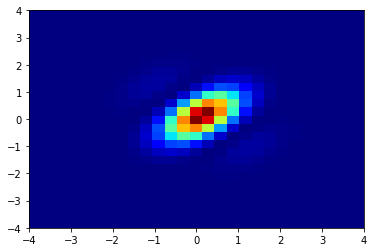

In [198]:
train_res=[]
def f_model(x1,x2,a,b):
    return np.cos(a*x1-b*x2)**2*np.exp(-a*x1**2-b*x2**2)

numx=28
numy=28
x1_train_list=np.linspace(-4,4,numx)
x2_train_list=np.linspace(-4,4,numy)
x1_grid_train,x2_grid_train=np.meshgrid(x1_train_list,x2_train_list)

y_train=f_model(x1_grid_train,x2_grid_train,1,1)

fig1=plt.figure()
plt.pcolormesh(x1_grid_train,x2_grid_train,y_train,cmap='jet')
plt.show()

In [199]:
n_single_train=1000
# a_train=np.random.rand(n_single_train)
# b_train=np.random.rand(n_single_train)

a_train=torch.linspace(0,1,n_single_train)
b_train=torch.cos(torch.linspace(0,1,n_single_train)*3)**2

y_real=torch.stack([a_train,b_train],dim=0)
# n_test=60
# a_test=np.random.rand(n_epochs)
# b_test=np.random.rand(n_epochs)

# y_real=torch.from_numpy(np.transpose(np.array([a_train,b_train])))
# y_real=y_real.to(torch.float32)

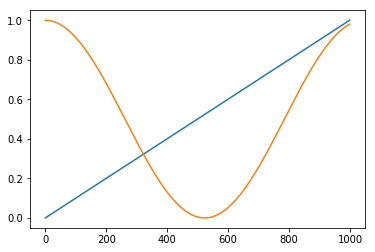

In [200]:
fig1=plt.figure()
plt.plot(a_train,label='test a')
plt.plot(b_train,label='test b')
# plt.plot(y_predict_train_mat[0,:,0],label='predict a')
# plt.plot(y_predict_train_mat[0,:,1],label='predict b')
plt.show()

In [201]:
y_predict_train_mat=np.zeros((n_epochs,n_single_train,2))

In [202]:
loss_func = torch.nn.MSELoss()
for i in range(n_epochs):
    for m in range(n_single_train):
        # 输入数据进行预测
        #data_use=torch.from_numpy(f_model(x1_grid_train,x2_grid_train,a_train[m],b_train[m]))
        data_use=f_model(x1_grid_train,x2_grid_train,a_train[m],b_train[m])
        data_use=data_use.view(1,1,numy,numx)
        data_use=data_use.to(torch.float32)
        prediction = network(data_use)
        # 计算预测值与真值误差，注意参数顺序问题
        # 第一个参数为预测值，第二个为真值
        loss = loss_func(prediction,y_real[:,m] )

        # 开始优化步骤
        # 每次开始优化前将梯度置为0
        optimizer.zero_grad()
        # 误差反向传播
        loss.backward()
        # 按照最小loss优化参数
        optimizer.step()

        y_predict_train_mat[i,m,:]=np.ravel(prediction.data.numpy())
    print(i)

C:\Users\xiail\AppData\Local\Programs\Python\Python37\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [204]:
from matplotlib import animation
from IPython.display import HTML

x_plot=np.linspace(1,n_single_train,n_single_train)
fig = plt.figure()
ax = plt.axes(xlim=(0, n_single_train), ylim=(0, 1))
plt.plot(x_plot,a_train,'r-',label='given a')
plt.plot(x_plot,b_train,'b-',label='given b')

line1, = plt.plot([],'o',label='predicted a')
line2, = plt.plot([],'o' ,label='predicted b')
txtshow=plt.text(300, 0.8, '', fontdict={'size': 15, 'color': 'red'})
plt.legend(loc='lower right')
# Initialization function: plot the background of each frame
def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return line1,line2
# Animation function which updates figure data.  This is called sequentially
def animate(i):
    line1.set_data(x_plot,y_predict_train_mat[i,:,0])
    line2.set_data(x_plot,y_predict_train_mat[i,:,1])
    txtshow.set_text(
        'Train Time =%d'  %i)
    return line1,line2

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_epochs, interval=300, blit=True)
plt.close(anim._fig)
# Call function to display the animation
HTML(anim.to_html5_video())

In [207]:
HTML(anim.to_jshtml())

我们可以接着用新的数据测试一下

In [229]:
n_test=100
a_test=torch.linspace(0,1,n_test)
b_test=torch.cos(torch.linspace(0,1,n_test)*4)**2

y_predict_test_mat=np.zeros((n_test,2))

In [230]:
with torch.no_grad():
    for m in range(n_test):
        # 输入数据进行预测
        #data_use=torch.from_numpy(f_model(x1_grid_train,x2_grid_train,a_train[m],b_train[m]))
        data_use=f_model(x1_grid_train,x2_grid_train,a_test[m],b_test[m])
        data_use=data_use.view(1,1,numy,numx)
        data_use=data_use.to(torch.float32)
        prediction = network(data_use)

        y_predict_test_mat[m,:]=np.ravel(prediction.data.numpy())

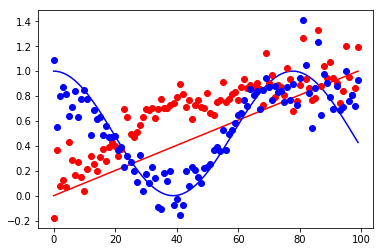

In [231]:
fig1=plt.figure()
plt.plot(a_test,'r-',label='test a')
plt.plot(b_test,'b-',label='test b')
plt.plot(y_predict_test_mat[:,0],'ro',label='predict a')
plt.plot(y_predict_test_mat[:,1],'bo',label='predict b')
plt.show()

可以看见，只要训练过后，其准确率还是有的，这只是一个简单的模型，如果要优化我们就得设置更加深的网络，并且增大训练周期。